# 1.2 重回帰

説明変数が $p$ 個ある場合の線形回帰（重回帰）：

$$
y = \beta_0 + \beta_1 x_1 + \cdots \beta_p x_p
$$

を考えます．$N$ 個のサンプル数にたいして，

$$
\boldsymbol{y} = \begin{pmatrix} y_1 \\ \vdots \\ y_N \end{pmatrix} \in \mathbb{R}^N, \quad X = \begin{pmatrix} 1 & x_{1, 1} & \cdots & x_{1, p} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{N, 1} & \cdots & x_{N, p} \end{pmatrix} \in \mathbb{R}^{N \times (p + 1)}, \quad \boldsymbol{\beta =} \begin{pmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_p \end{pmatrix} \in \mathbb{R}^{p + 1}
$$

とおき，ロスを

$$
L = \left\Vert \boldsymbol{y} - X \boldsymbol{\beta} \right\Vert_2^2 = \left( \boldsymbol{y} - X \boldsymbol{\beta} \right)^{\top} \left( \boldsymbol{y} - X \boldsymbol{\beta} \right)
$$

とおきます

$$
\frac{\partial L}{\partial \boldsymbol{\beta}} = - 2 X^{\top} \left( \boldsymbol{y} - X \boldsymbol{\beta} \right) = \boldsymbol{0}_{p}
$$

をとくと，$X^{\top} X \in \mathbb{R}^{(p+1) \times (p+1)}$ が逆行列を持つとき，

$$
\hat{\boldsymbol{\beta}} = \left( X^{\top} X \right)^{-1} X^{\top} y
$$

と推定することができます．

では，$X^{\top} X$ はいつ逆行列を持つのでしょうか．
$X^{\top} X$ の階数は，

$$
\mathrm{rank} \left( X^{\top} X  \right) \le \mathrm{rank} \left( X \right) \le \min \{ N, p + 1\}
$$

であるため，$N < p + 1$ の場合 $\mathrm{rank} \left( X^{\top} X \right) < p + 1$ のため逆行列を持つことは決してありません．
したがって，サンプル数 $N$ は少なくとも 説明変数の数より大きくなければいけません．

また，$X^{\top} X$ と $X$ は同じ階数を持つことも証明できます．

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class MultipleLinearRegression:
    def __init__(self, X: np.ndarray, y: np.ndarray):
        """
        Initialize the MultipleLinearRegression model with training data.
        """
        if X is None or y is None:
            raise ValueError("X and y cannot be None.")

        if X.ndim != 2 or y.ndim != 1:
            raise ValueError("X must be a 2D array and y must be a 1D array.")

        if X.shape[0] != y.shape[0]:
            raise ValueError("Number of samples in X and y must match.")

        self.X = X
        self.y = y
        self.beta = None

    @staticmethod
    def generate_samples(*, n_samples: int = 100, n_features: int = 2, beta: np.ndarray):
        """
        Generate synthetic data for multiple linear regression.
        """
        if beta is None:
            raise ValueError("beta cannot be None.")

        if len(beta) != n_features + 1:
            raise ValueError("Length of beta must be equal to n_features + 1.")

        if beta.ndim != 1:
            raise ValueError("beta must be a 1D array.")

        X = np.random.rand(n_samples, n_features)
        X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)  # Add intercept term
        y = X @ beta + np.random.normal(0, 0.1, n_samples)
        return X, y

    def fit(self):
        """
        Fit the model using the Normal Equation method.
        """
        self.beta = np.linalg.inv(self.X.T @ self.X) @ self.X.T @ self.y

    def predict(self, X: np.ndarray):
        """
        Predict using the fitted model.
        """
        if self.beta is None:
            raise ValueError("Model is not fitted yet. Call fit() before predict().")

        if X.ndim != 2:
            raise ValueError("X must be a 2D array.")

        if X.shape[1] != self.X.shape[1]:
            raise ValueError("Number of features in X must match the training data.")

        return X @ self.beta

    def show_parameters(self):
        """
        Print the model parameters (coefficients).
        """
        if self.beta is None:
            raise ValueError("Model is not fitted yet. Call fit() before show_parameters().")

        print("Model parameters (coefficients):")
        for i, b in enumerate(self.beta):
            print(f"beta[{i}] = {b}")

    def plot_2d(self):
        """
        Plot the fitted model against the training data.
        Note: This method is only suitable for 2D feature space.
        """
        if self.X.shape[1] != 2:
            raise ValueError("Plotting is only supported for 2D feature space (2 features + intercept).")

        plt.scatter(self.X[:, 1], self.y, color='blue', label='Data points')
        plt.plot(self.X[:, 1], self.predict(self.X), color='red', label='Fitted line')
        plt.xlabel('Feature 1')
        plt.ylabel('Target variable')
        plt.title('Multiple Linear Regression Fit')
        plt.legend()
        plt.show()

    def plot_3d(self):
        """
        Plot the fitted model against the training data in 3D.
        Note: This method is only suitable for 3D feature space.
        """
        if self.X.shape[1] != 3:
            raise ValueError("Plotting is only supported for 3D feature space (2 features + intercept).")

        from mpl_toolkits.mplot3d import Axes3D

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(self.X[:, 1], self.X[:, 2], self.y, color='blue', label='Data points')

        # Create a grid to plot the surface
        x1_range = np.linspace(self.X[:, 1].min(), self.X[:, 1].max(), 10)
        x2_range = np.linspace(self.X[:, 2].min(), self.X[:, 2].max(), 10)
        x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
        X_grid = np.c_[np.ones(x1_grid.ravel().shape), x1_grid.ravel(), x2_grid.ravel()]
        y_pred = self.predict(X_grid).reshape(x1_grid.shape)

        ax.plot_surface(x1_grid, x2_grid, y_pred, color='red', alpha=0.5)
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Target variable')
        plt.title('Multiple Linear Regression Fit in 3D')
        plt.legend()
        plt.show()

    def plot(self):
        """
        Plot the fitted model against the training data.
        This method automatically determines whether to use 2D or 3D plotting.
        """
        if self.X.shape[1] == 2:
            self.plot_2d()
        elif self.X.shape[1] == 3:
            self.plot_3d()
        else:
            raise ValueError("Plotting is only supported for 2D or 3D feature space.")

Model parameters (coefficients):
beta[0] = 4.996643429361251
beta[1] = 2.997828097635458
beta[2] = 1.0041301062808143


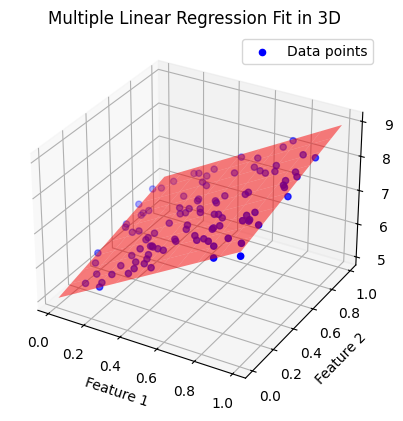

In [ ]:
n_samples = 100
n_features = 2
beta = np.array([5, 3, 1])  # Intercept and coefficients for two features

X, y = MultipleLinearRegression.generate_samples(n_samples=n_samples, n_features=n_features, beta=beta)
model = MultipleLinearRegression(X, y)
model.fit()
model.show_parameters()
model.plot()